# Ekstraksi Kata Kunci pada dokumen


In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data_tugas4/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
987,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Politik
988,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Politik
989,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Politik
990,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Politik


## Pre Processing

In [23]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Ambil satu data

In [24]:
sampel = data.head(1)
sampel

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport


In [25]:
#Remove Puncutuation
clean_symbol = re.compile('[^a-zA-Z\s]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text).lower()
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = sampel['Content'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Content
0,asapi francesco bagnaia di motogp jepang ...


## Stopword

In [27]:
# Unduh stop words dari nltk
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stop words dari setiap kalimat
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'Kalimat' dalam DataFrame
stopword = clean['Content'].apply(remove_stopwords)
df=pd.DataFrame(stopword)
df

,Content
0,asapi francesco bagnaia motogp jepang jorge ma...


## Term Frequency

In [29]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(df['Content']).T * vectorizer.fit_transform(df['Content'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,air,akrab,akun,ancaman,angka,apapun,asapi,baca,bagnaia,bahagia,...,terpaksa,terpaut,tersisa,tim,to,up,urutan,utama,valentino,wib
air,64,72,72,48,72,56,8,112,400,72,...,40,72,72,72,72,72,56,8,48,8
akrab,72,81,81,54,81,63,9,126,450,81,...,45,81,81,81,81,81,63,9,54,9
akun,72,81,81,54,81,63,9,126,450,81,...,45,81,81,81,81,81,63,9,54,9
ancaman,48,54,54,36,54,42,6,84,300,54,...,30,54,54,54,54,54,42,6,36,6
angka,72,81,81,54,81,63,9,126,450,81,...,45,81,81,81,81,81,63,9,54,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
up,72,81,81,54,81,63,9,126,450,81,...,45,81,81,81,81,81,63,9,54,9
urutan,56,63,63,42,63,49,7,98,350,63,...,35,63,63,63,63,63,49,7,42,7
utama,8,9,9,6,9,7,1,14,50,9,...,5,9,9,9,9,9,7,1,6,1
valentino,48,54,54,36,54,42,6,84,300,54,...,30,54,54,54,54,54,42,6,36,6


## Graph

In [37]:
G = nx.Graph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 450 and idx != col:
            G.add_edge(idx, col, weight=weight)

In [34]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('motogp', 0.1307653992318378),
 ('martin', 0.10573862510521113),
 ('balapan', 0.09671029553136552)]

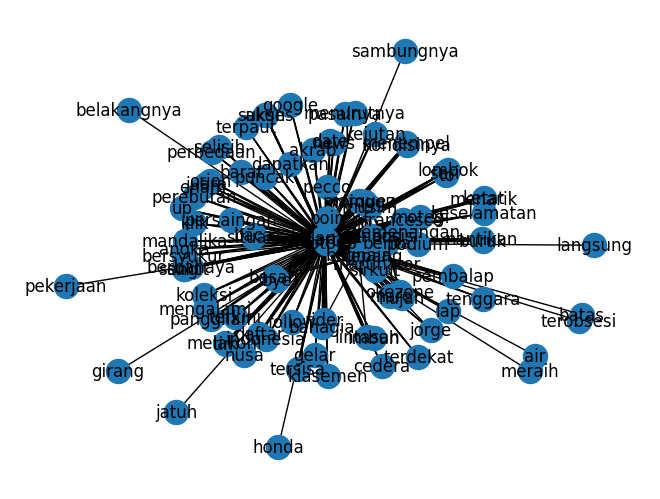

In [38]:
nx.draw(G,with_labels=True)